<a href="https://colab.research.google.com/github/Ramya-r-reddy/Sales-trend-anlysis-and-prediction-using-data-analysis/blob/main/Copy_of_sales_trend_Analysis_and_Prediction_using_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfe =pd.read_csv('/content/sales_data (1).csv', encoding ="ISO-8859-1")
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
dfe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
dfe['Amount'].unique()

array([23952., 23934., 23924., ...,   213.,   206.,   188.])

1. Fetching null data from amount col

In [ ]:
dfe['Amount'][dfe['Amount'].isnull()]

,Amount
7,NaN
14,NaN
16,NaN
109,NaN
111,NaN
184,NaN
293,NaN
344,NaN
345,NaN
452,NaN




 2. Dropping unwanted cols such as status and unnamed1

In [ ]:
dfe.drop(['Status','unnamed1'],inplace =True,axis =1)

In [ ]:
dfe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


3. Delete all the null valuesfrom  the data frame

In [ ]:
dfe.dropna(inplace=True)

In [ ]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


4. Rename the column Martial_Status to Marital

In [ ]:
dfe.rename(columns={'Marital_Status':'Marital'},inplace=True)
dfe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


6. change the values of marital col 0 to single  ,1 to married

In [ ]:
d ={0:'Single',1:'Married'}
dfe['Marital']=dfe['Marital'].replace(d)
dfe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


7. change the values of gender col f to female ,m to male

In [ ]:
d ={'F':'Female','M':'Male'}
dfe['Gender']=dfe['Gender'].replace(d)
dfe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,Female,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,Male,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


8. visualise the count of males and Females based on gender column using sea born

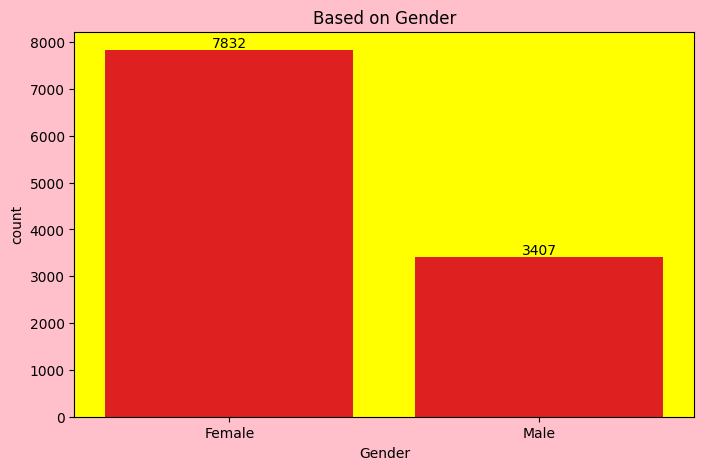

In [ ]:
figure=plt.figure(figsize=(8,5), facecolor ='pink')
a=sns.countplot(x='Gender',data=dfe,color = 'red')
plt.title('Based on Gender')

for i in a.containers:
  a.bar_label(i)

ax=plt.gca()
ax.set_facecolor('yellow')

Conclusion –

Based on Gender Count:
The chart shows Females (7,832) significantly outnumber Males (3,407) in the dataset.

Conclusion: There is a higher participation or representation of females in the data, suggesting female users are more active or prevalent in this context (likely in purchases or survey responses).

9. Group by gender ,age_group,state,occupation,product_category,marital_staus

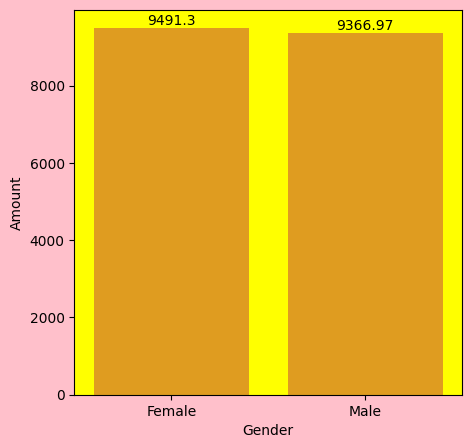

In [ ]:
plt.figure(figsize=(5,5),facecolor = 'pink')
c=sns.barplot(x='Gender',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)


plt.show()

Conclusion :

The chart shows that females have a slightly higher amount (₹9491.30) than males (₹9366.97), indicating a small gender-based difference.

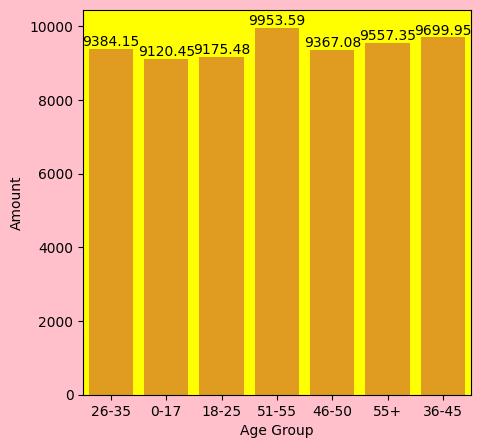

In [ ]:
plt.figure(figsize=(5,5),facecolor = 'pink')
c=sns.barplot(x='Age Group',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)

plt.show()

Conclusion:

The 51–55 age group has the highest amount (₹9953.59), while the 18–25 group has the lowest (₹9120.45). Overall, middle-aged groups tend to show higher amounts than younger ones.


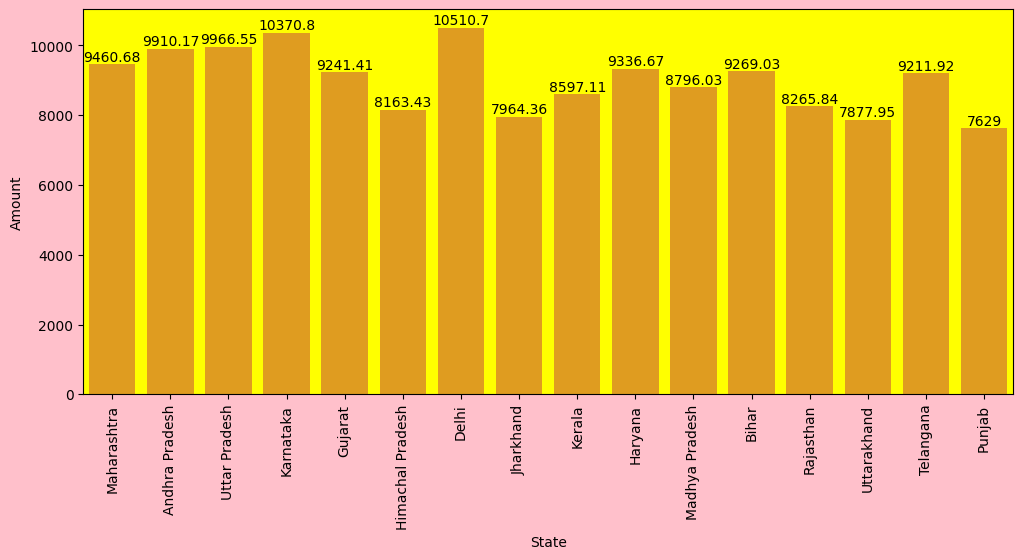

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,5),facecolor = 'pink')
c=sns.barplot(x='State',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)
plt.xticks(rotation=90)

plt.show()
plt.tight_layout()


Conclusion :

Delhi has the highest amount (₹10510.7), while Jharkhand has the lowest (₹7964.36). Overall, there's noticeable variation across states, with northern regions like Delhi and Himachal Pradesh showing higher values.



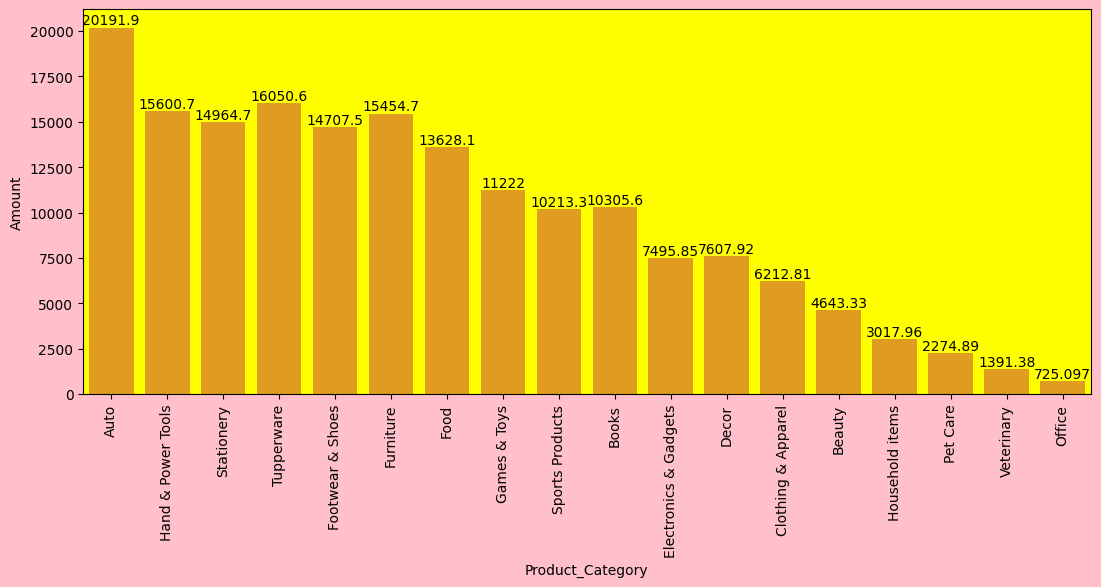

In [ ]:
plt.figure(figsize=(13,5),facecolor = 'pink')
c=sns.barplot(x='Product_Category',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)
plt.xticks(rotation=90)

plt.show()

Conclusion

The highest amount is in the **Auto** category (₹20191.9), while **Office** has the lowest (₹725.10). Overall, spending is significantly higher in essential and utility-based categories compared to niche or low-demand segments.


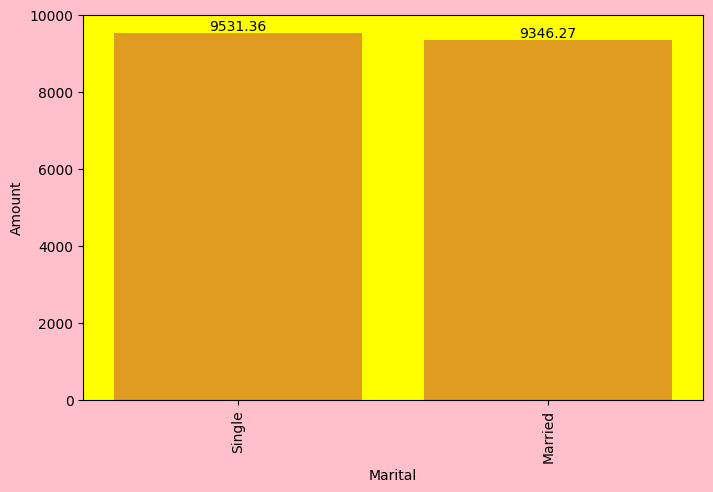

In [ ]:
plt.figure(figsize=(8,5),facecolor = 'pink')
c=sns.barplot(x='Marital',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)
plt.xticks(rotation=90)

plt.show()

Conclusion :

Singles (₹9531.36) spend slightly more on average than married individuals (₹9346.27), indicating marital status has minimal impact on overall spending behavior.






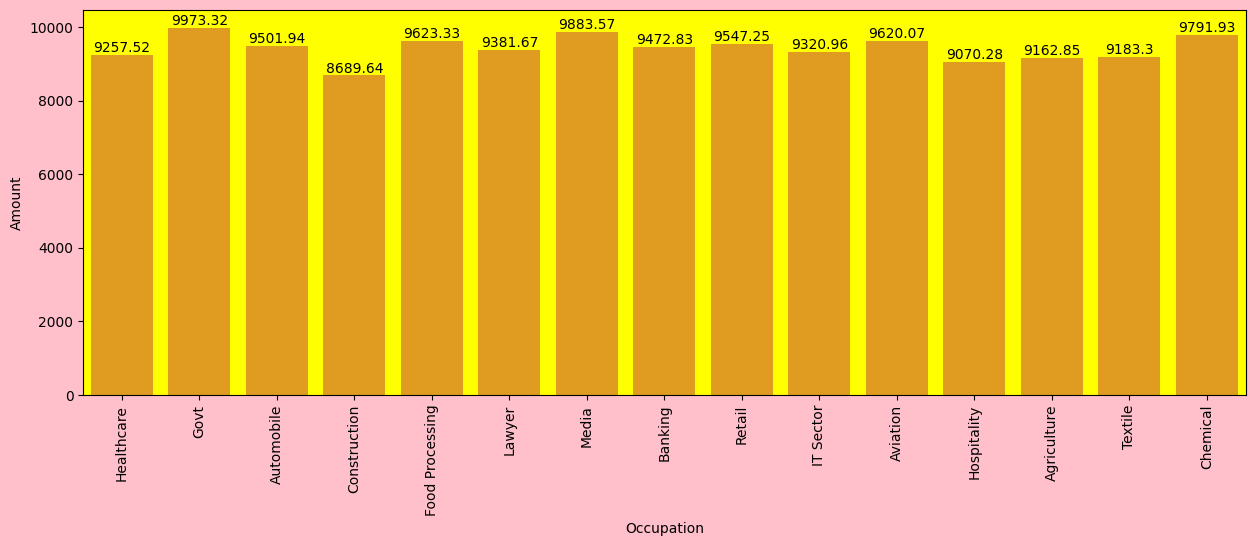

In [ ]:
plt.figure(figsize=(15,5),facecolor = 'pink')
c=sns.barplot(x='Occupation',y ='Amount',data=dfe,errorbar =None,color ='orange')
axes =plt.gca()
axes.set_facecolor('yellow')

for i in c.containers:
  c.bar_label(i)
plt.xticks(rotation=90)

plt.show()

Conclusion :

Professionals in the **Media (₹9883.57)**, **Government (₹9973.32)**, and **Chemical (₹9791.93)** sectors show the highest spending, while those in **Construction (₹8689.64)** and **Hospitality (₹9070.28)** spend relatively less. Overall, spending varies moderately across occupations, indicating some correlation between professional sector and expenditure patterns.



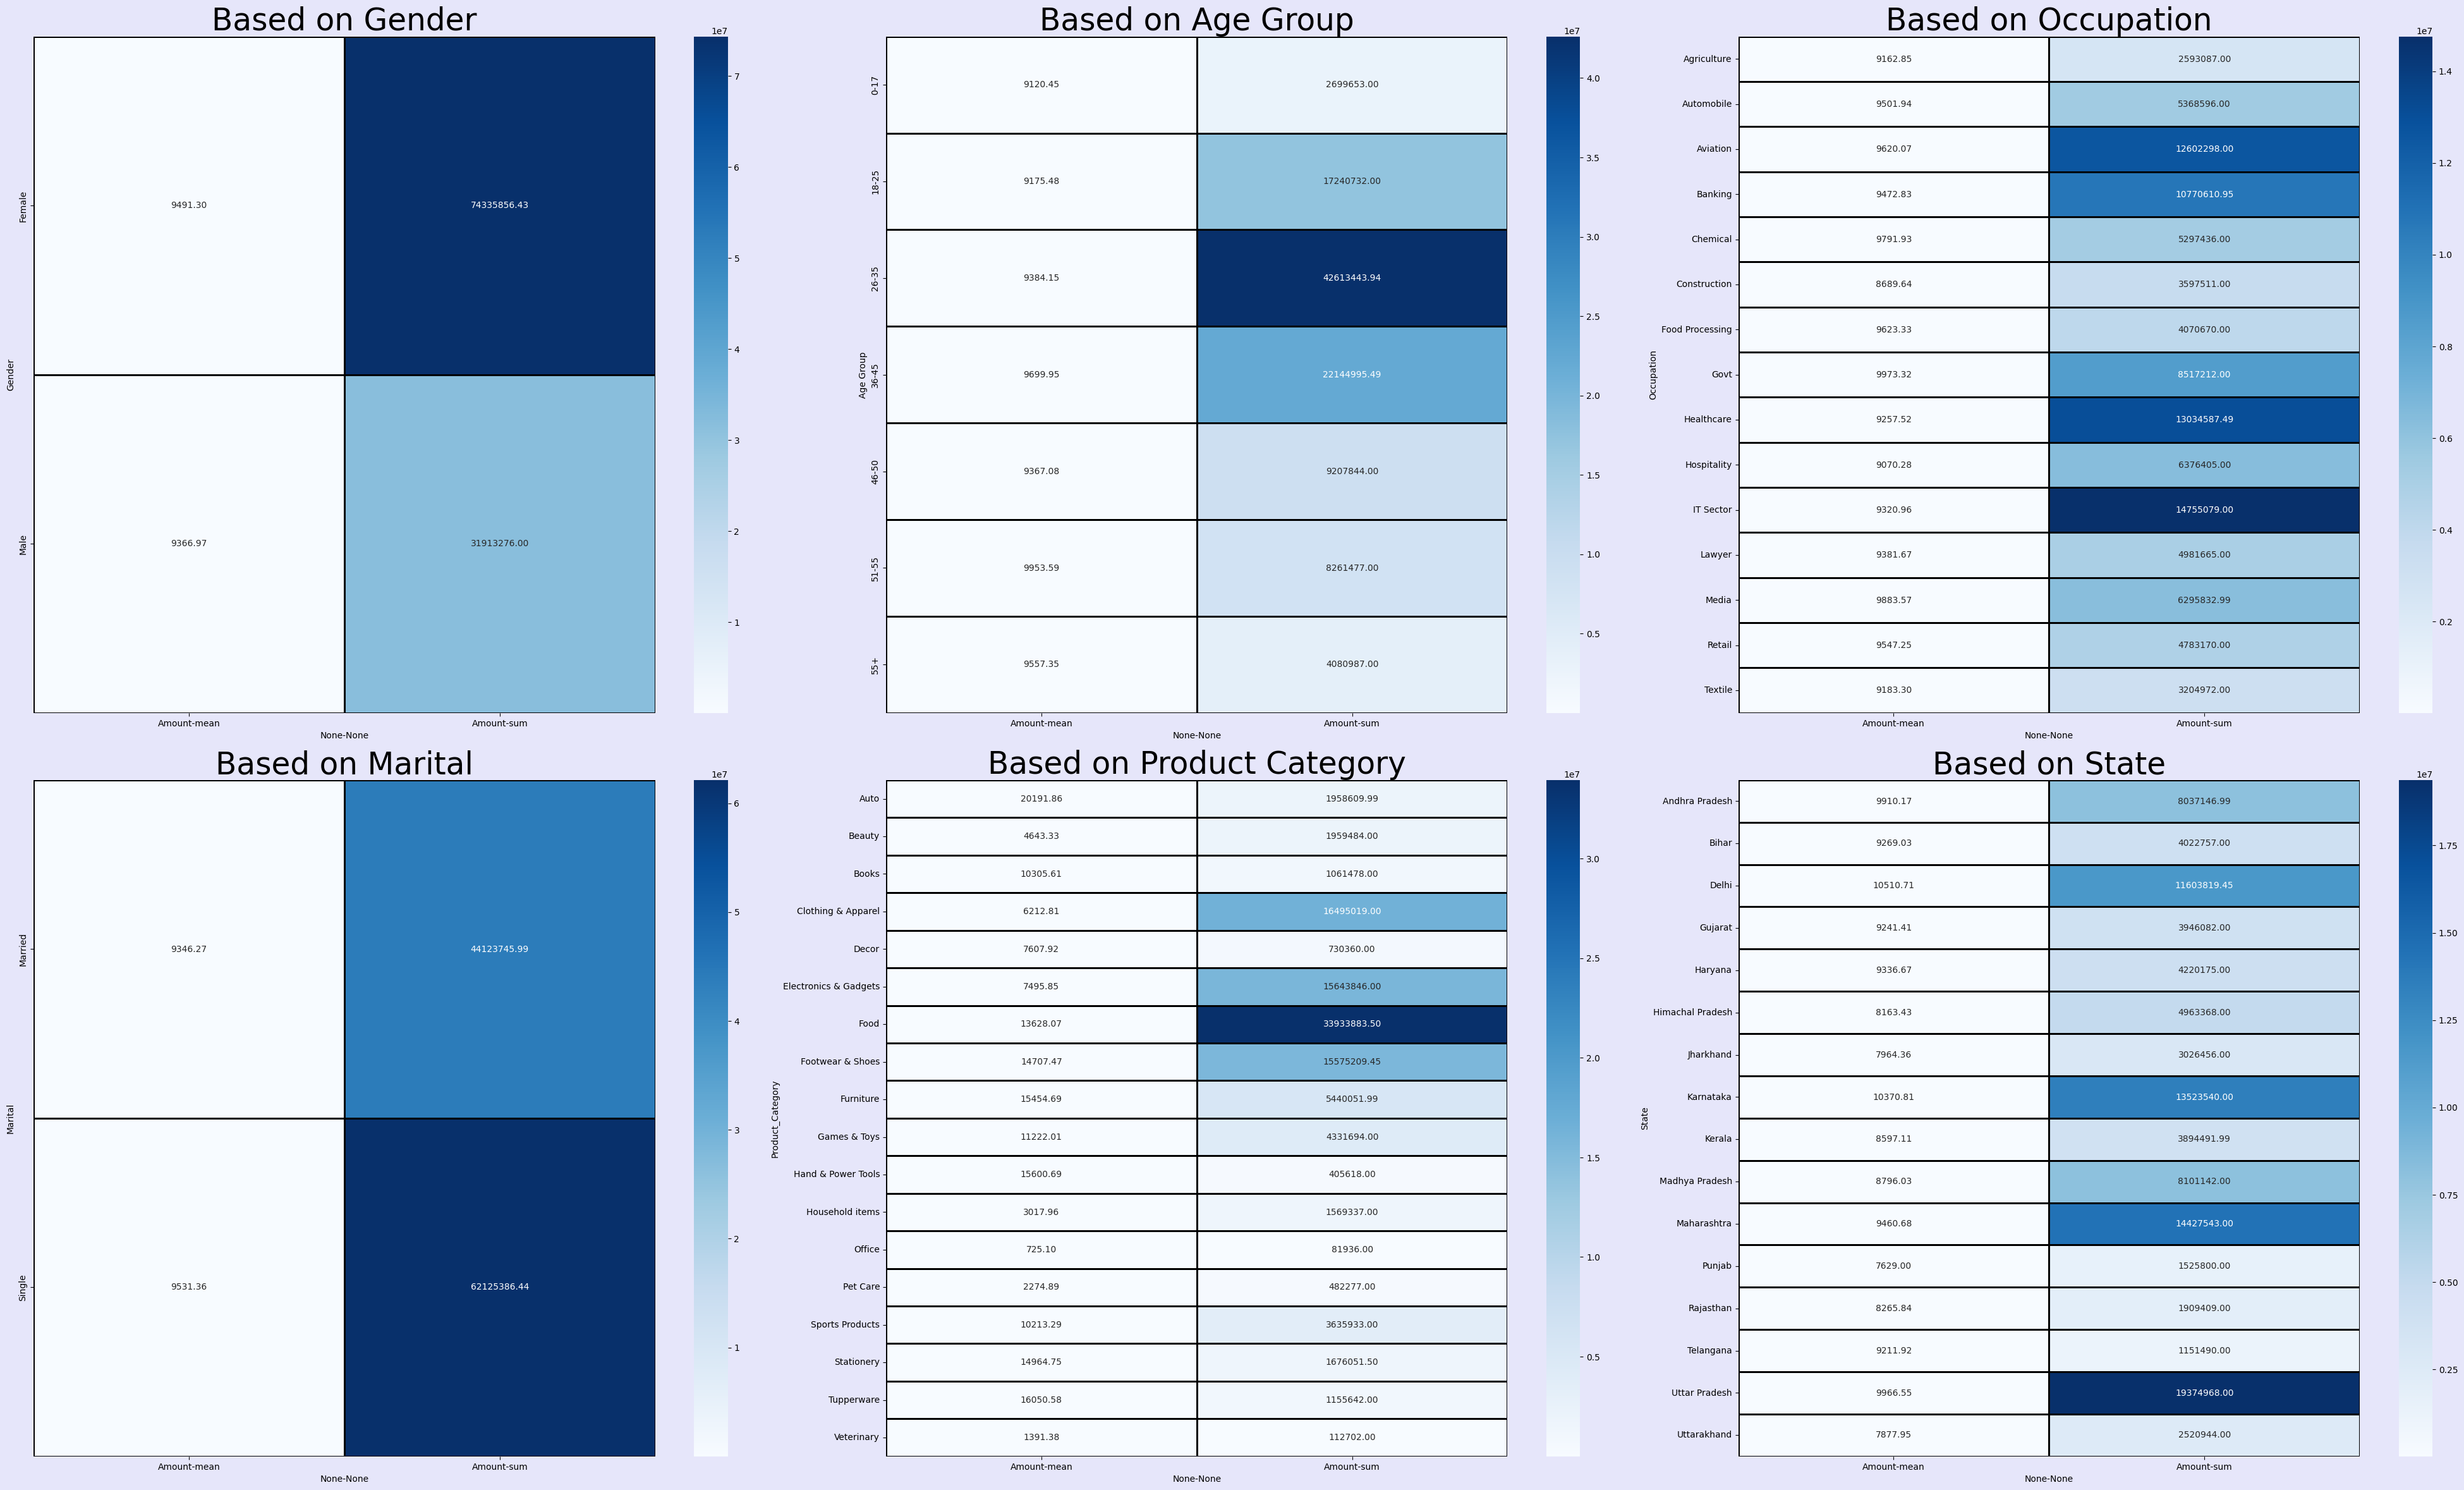

In [ ]:
plt.figure(figsize=(40,35),facecolor = 'lavender')
plt.subplot(3,3,1)
a = dfe.pivot_table(values =['Amount'],index='Gender',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on Gender',fontsize=35)

plt.subplot(3,3,2)
a = dfe.pivot_table(values =['Amount'],index='Age Group',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on Age Group',fontsize=35)

plt.subplot(3,3,3)
a = dfe.pivot_table(values =['Amount'],index='Occupation',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on Occupation',fontsize=35)

plt.subplot(3,3,4)
a = dfe.pivot_table(values =['Amount'],index='Marital',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on Marital',fontsize=35)

plt.subplot(3,3,5)
a = dfe.pivot_table(values =['Amount'],index='Product_Category',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on Product Category',fontsize=35)


plt.subplot(3,3,6)
a = dfe.pivot_table(values =['Amount'],index='State',aggfunc=('sum','mean'))
sns.heatmap(a,annot=True,cmap='Blues',linewidth=2,linecolor='black',fmt='.2f')
ax =plt.gca()
ax.set_title('Based on State',fontsize=35)



plt.tight_layout()

Conclusion:

Average Information:

---

### **1. Based on Gender**

* **Females** contribute the highest total transaction amount (≈ 74.3M) compared to males (≈ 31.9M), despite similar average spend per transaction.
* **Conclusion:** Females are the dominant spending group overall.

---

### **2. Based on Age Group**

* The **25–35** age group leads in total spending (≈ 42.6M), followed by 36–45.
* **Conclusion:** Young adults (25–35) are the most financially active age group.

---

### **3. Based on Occupation**

* **IT Sector**, **Healthcare**, and **Aviation** are top contributors in transaction volume.
* **Conclusion:** Professionals in tech and healthcare sectors are the highest spenders.

---

### **4. Based on Marital Status**

* **Married individuals** spend more both in total (≈ 62.1M) and per transaction.
* **Conclusion:** Married people are more likely to make higher and frequent purchases.

---

### **5. Based on Product Category**

* **Food**, **Footwear**, and **Clothing** lead in total spend; **Tools** and **Tupperware** have high average spends.
* **Conclusion:** Essentials and lifestyle items dominate purchase categories.

---

### **6. Based on State**

* **Uttar Pradesh**, **Maharashtra**, and **Delhi** top the total spending list; **Delhi** has the highest average transaction amount.
* **Conclusion:** Urban states drive the highest consumer spending.

---



